In [18]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt 

In [19]:
(x_train,_),(x_test,_)=keras.datasets.mnist.load_data()
x_train=x_train.reshape((x_train.shape[0],-1)).astype('float32')/255.0
x_test=x_test.reshape((x_test.shape[0],-1)).astype('float32')/255.0



In [20]:
input_dim = 784
hidden_dim = 64
sparsity_level = 0.05
lambda_sparse = 0.1


In [21]:
inputs=layers.Input(shape=(input_dim,))
encoded=layers.Dense(hidden_dim,activation='relu')(inputs)
decoded=layers.Dense(input_dim,activation='sigmoid')(encoded)
autoencoder=keras.Model(inputs,decoded)
encoder=keras.Model(inputs,encoded)

In [22]:
def sparse_loss(y_true, y_pred):
    # Reconstruction loss
    mse_loss = tf.reduce_mean(keras.losses.MeanSquaredError()(y_true, y_pred))

    # KL divergence encourages sparsity in the hidden layer
    hidden_layer_output = encoder(y_true)
    mean_activation = tf.reduce_mean(hidden_layer_output, axis=0)
    kl_divergence = tf.reduce_sum(
        sparsity_level * tf.math.log(sparsity_level / (mean_activation + 1e-10))
        + (1 - sparsity_level) * tf.math.log((1 - sparsity_level) / (1 - mean_activation + 1e-10))
    )

    return mse_loss + lambda_sparse * kl_divergence


compile the autoencoder 

In [24]:
autoencoder.compile(optimizer='adam',loss=sparse_loss)

In [25]:
history=autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1876
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1020
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0756
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0632
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0559
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0519
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0490
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0465
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0444
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0433
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0420
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0409
Epoch 13/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0399
Epoch 14/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0390
Epoch 15/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

In [26]:
reconstructed=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


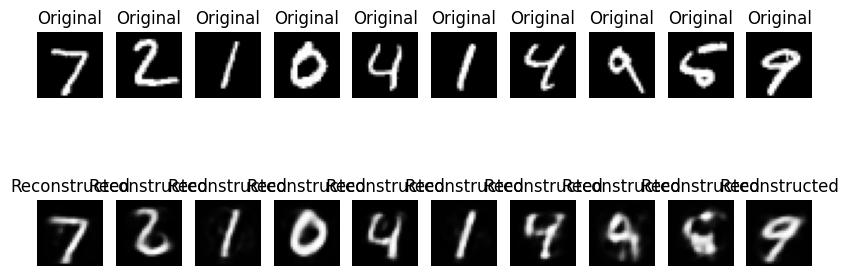

In [30]:
n = 10
plt.figure(figsize=(10, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, n + i + 1)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
